In [1]:
#IMPORT THE INDEPEDENCIES
import numpy as np 
import pandas as pd
from google.colab import drive


In [2]:
#SETTING COUMNS NAMES BY MYSELF BECAUSE COLUMN NAMES WERE JUST RANDOMLY GIVEN
col_names=['buying_price','maintenance_cost','no_of_doors','no_of_persons','lug_boot','safety','decision']

In [3]:
#LOAD THE DATA TO PANDAS
drive.mount('/content/drive')
dataset = pd.read_csv('/content/drive/MyDrive/Datasets/Datasets/car_evaluation.csv',names = col_names)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#DISPLAYING THE UNCLEANED DATA
dataset

,buying_price,maintenance_cost,no_of_doors,no_of_persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [5]:
#CHECKING FOR ANY NULL VALUES
dataset.isnull().sum()

buying_price        0
maintenance_cost    0
no_of_doors         0
no_of_persons       0
lug_boot            0
safety              0
decision            0
dtype: int64

In [6]:
#Converting non categorical values in our data to categorical values 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['e_buying_price'] = le.fit_transform(dataset['buying_price'])
dataset['e_maintenance_cost'] = le.fit_transform(dataset['maintenance_cost'])
dataset['e_lug_boot'] = le.fit_transform(dataset['lug_boot'])
dataset['e_safety'] = le.fit_transform(dataset['safety'])
dataset['labels'] = le.fit_transform(dataset['decision'])

#REMOVING THE USLESS ADDITIONAL COLUMNS
dataset = dataset.drop(['buying_price','maintenance_cost','lug_boot','safety','decision'], axis=1)

#SETTING CATEGORIES OF THESE COLUMNS MANUALLY
dataset.no_of_doors = dataset.no_of_doors.map( {"5more":5, "2":2, "3":3, "4":4} )
dataset.no_of_persons = dataset.no_of_persons.map( {"more":5,"2":2, "4":4} )



In [7]:
#DISPLAYING THE CLEANED DATA
dataset

,no_of_doors,no_of_persons,e_buying_price,e_maintenance_cost,e_lug_boot,e_safety,labels
0,2,2,3,3,2,1,2
1,2,2,3,3,2,2,2
2,2,2,3,3,2,0,2
3,2,2,3,3,1,1,2
4,2,2,3,3,1,2,2
...,...,...,...,...,...,...,...
1723,5,5,1,1,1,2,1
1724,5,5,1,1,1,0,3
1725,5,5,1,1,0,1,2
1726,5,5,1,1,0,2,1


In [8]:
#ASSIGNING THE DPENDENT AND INDEPENDENT VARIABLES
X= dataset.iloc[:,:-1].values
y= dataset.iloc[:,-1].values

In [9]:
#SPLITING THE DATA ITNO TRAIN AND TEST SUBSETS
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [10]:
#LOAD AND TRAIN THE MODEL
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=10) #max depth is set to 10 to avoid overfitting
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [11]:
#PREDICTING OUR MODEL ON TEST DATA 
y_pred = model.predict(X_test)

#SHOWING ACCURACY ON TEST DATA
model.score(X_test, y_test)

0.9614711033274956

In [12]:
#SHOWING ACCURACY ON TRAIN DATA
from sklearn.metrics import accuracy_score
acc=accuracy_score(model.predict(X_train), y_train)
acc

0.993085566119274

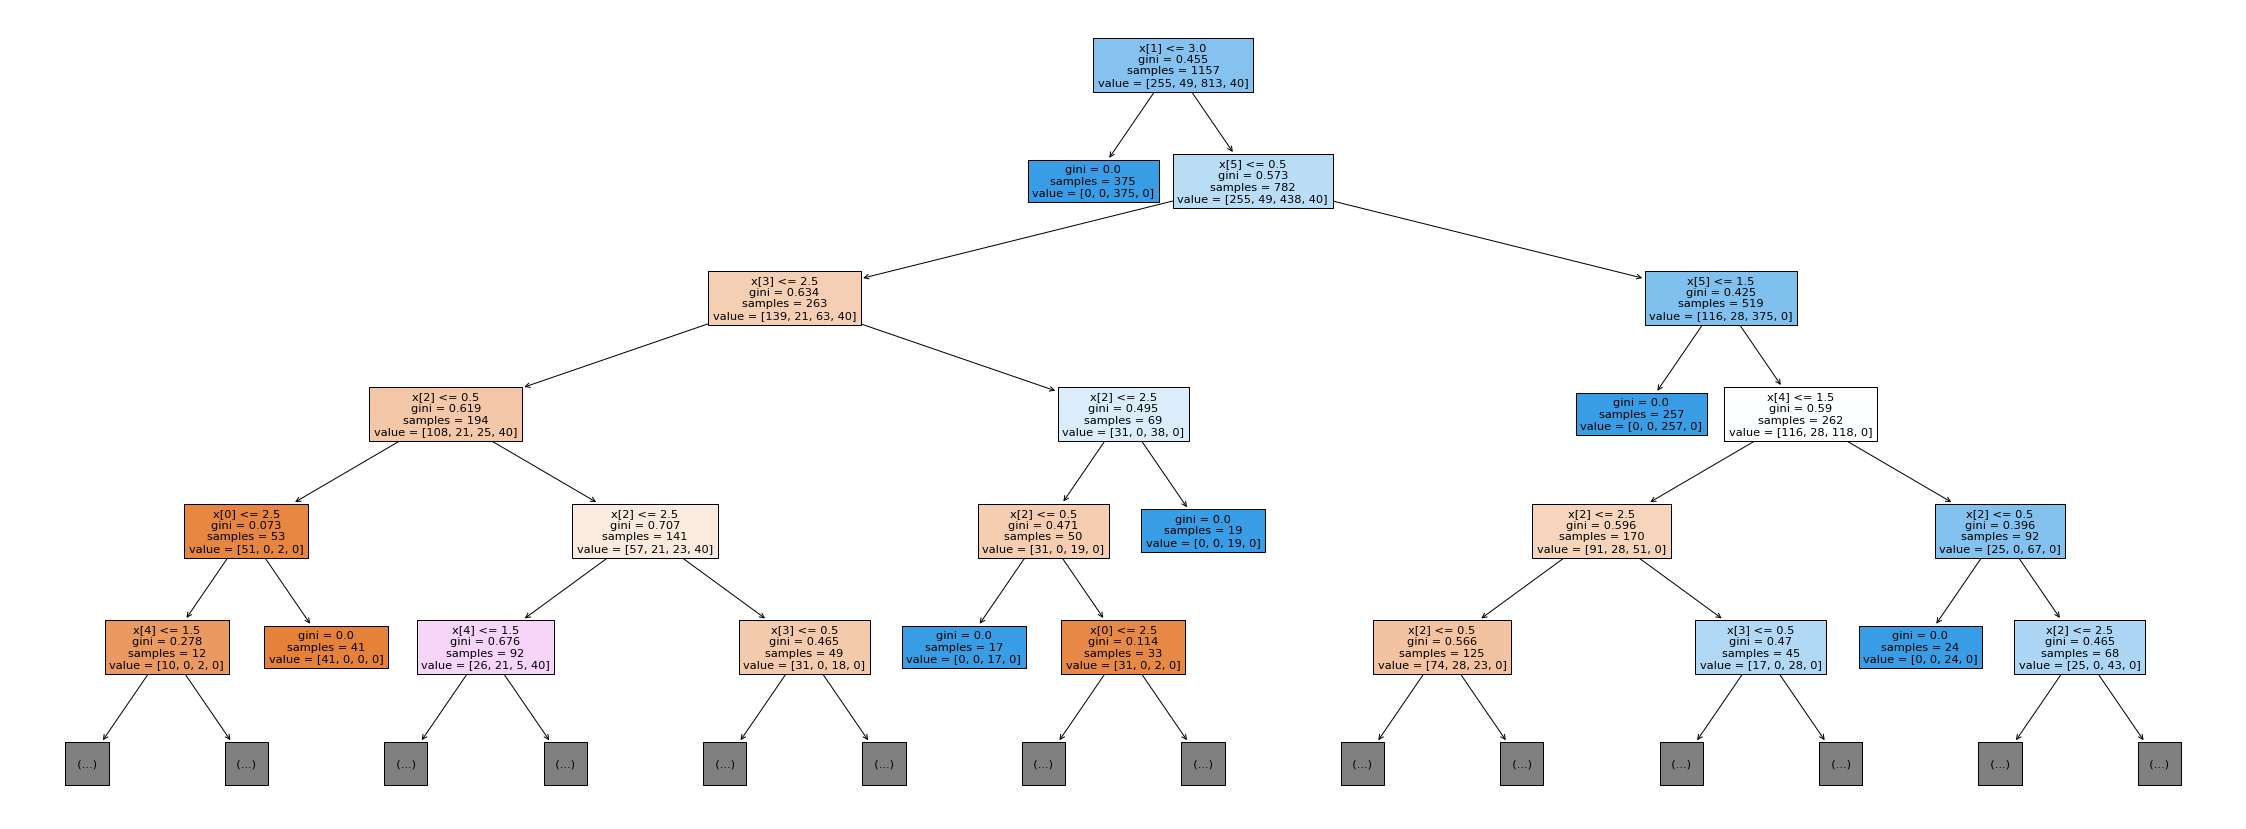

In [13]:
#PLOTTING THE DECISION TREE
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(40,15))
tree.plot_tree(model, max_depth=5, filled=True)
plt.show()